In [12]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('numeric_data.csv')

# Split the data into X (features) and y (target variable)
X = df.drop(['Title', 'Description', 'Genre', 'Processed_Description'], axis=1)  # Features: Numeric features
y = df['Genre']  # Target variable: Genre column

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the multi-label data
y_encoded = mlb.fit_transform(y)

# Print the shape of the encoded labels
print(y_encoded.shape[1])

# Get the generated class labels
genre_labels = mlb.classes_
print(genre_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

32
[' ' "'" ',' 'A' 'C' 'E' 'F' 'G' 'I' 'M' 'P' 'R' 'S' '[' ']' 'a' 'c' 'd'
 'e' 'g' 'i' 'l' 'm' 'n' 'o' 'p' 'r' 's' 't' 'u' 'v' 'y']


### Multi-Output Models: Multi-Output models, such as multi-output classifiers or regressors, extend traditional single-output models to handle multiple labels simultaneously. These models generate a separate output for each label and consider correlations between labels during training.

In [13]:
# Create an instance of the base classifier (e.g., RandomForestClassifier)
base_classifier = RandomForestClassifier()

# Create an instance of MultiOutputClassifier and pass the base classifier
multi_output_classifier = MultiOutputClassifier(base_classifier)

# Fit the multi-output classifier on the training data
multi_output_classifier.fit(X_train, y_train)

# Make predictions using the trained multi-output classifier
y_pred = multi_output_classifier.predict(X_test)

# Evaluate the performance of the multi-output classifier
# You can use appropriate evaluation metrics based on your problem, such as accuracy, F1-score, etc.
accuracy = multi_output_classifier.score(X_test, y_test)

# Compare Predictions with Actual Labels
# Compare the predicted labels (y_pred) with the actual labels (y_test) to see where the model's predictions match or differ from the ground truth.
comparison = pd.DataFrame({'Actual': mlb.inverse_transform(y_test),
                           'Predicted': mlb.inverse_transform(y_pred)})
print(comparison)

                                                Actual  \
0    ( , ', ,, A, C, F, I, P, [, ], a, d, e, i, l, ...   
1     ( , ', ,, I, S, [, ], a, d, e, g, i, n, r, t, y)   
2    ( , ', ,, A, G, I, P, R, [, ], d, e, i, n, r, ...   
3        ( , ', ,, C, I, [, ], a, d, e, i, l, n, s, u)   
4        ( , ', ,, C, I, [, ], a, d, e, i, l, n, s, u)   
..                                                 ...   
491                        (', A, [, ], c, i, n, o, t)   
492  ( , ', ,, A, C, I, S, [, ], a, d, e, i, l, m, ...   
493  ( , ', ,, C, I, S, [, ], a, d, e, g, i, l, m, ...   
494      ( , ', ,, C, I, [, ], a, d, e, i, l, n, s, u)   
495                           (', C, [, ], a, l, s, u)   

                                             Predicted  
0    ( , ', ,, A, I, [, ], a, d, e, i, l, n, r, t, ...  
1    ( , ', ,, A, I, S, [, ], a, c, d, e, g, i, m, ...  
2    ( , ', ,, A, I, [, ], a, d, e, i, l, n, r, t, ...  
3     ( , ', ,, A, I, [, ], c, d, e, i, n, o, s, t, u)  
4    ( , ', ,, A, 

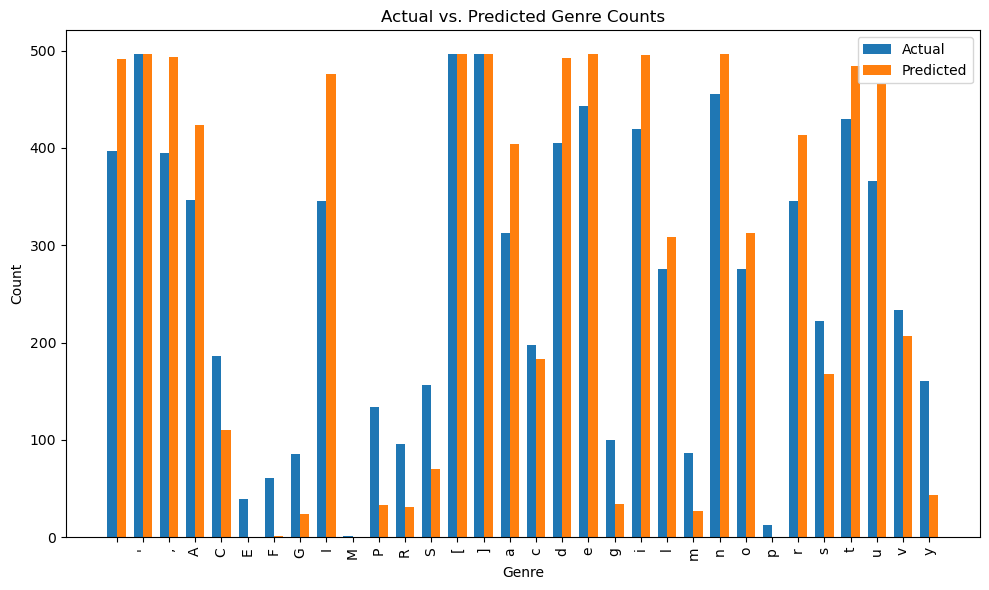

In [14]:
# Count the occurrences of each genre in the actual and predicted labels
actual_counts = np.sum(y_test, axis=0)
predicted_counts = np.sum(y_pred, axis=0)

# Create the positions for the bars
bar_width = 0.35
index = np.arange(len(genre_labels))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, actual_counts, bar_width, label='Actual')
plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Genre Counts')
plt.legend()
plt.xticks(index + bar_width / 2, genre_labels, rotation=90)
plt.tight_layout()
plt.show()

In [15]:
print(accuracy)

0.06653225806451613
